# **Project Name**    -  Global Terrorism Data (EDA)



# **GitHub Link -**

https://github.com/ShariqZahid/Global-Terrorism-EDA

# **Problem Statement**


Analyzing the factors responsible for Terrorism. Intentions and motives behind those terror attacks and Group involved in such terror attacks. Also, which region, country and cities are most affected by such attacks.

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland

## ***1. Know Your Data***

### Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/EDA Project/'
gt_df = pd.read_csv(path + "Global Terrorism Data.csv",encoding="ISO-8859-1")

<ipython-input-3-c55758d41c4d>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gt_df = pd.read_csv(path + "Global Terrorism Data.csv",encoding="ISO-8859-1")


### Dataset First View

In [4]:
# Dataset First Look
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
gt_df.shape

(181691, 135)

## We have 135 Columns in the given dataset. Let's try to filter the columns useful for our analysis.

In [6]:
gt_df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
df = gt_df[['iyear', 'imonth', 'country_txt','region_txt', 'city','attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'target1', 'gname', 'motive', 'weaptype1_txt','weapsubtype1_txt', 'nkill', 'nwound','propextent_txt','success']]
df.head(5)

,iyear,imonth,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,targsubtype1_txt,target1,gname,motive,weaptype1_txt,weapsubtype1_txt,nkill,nwound,propextent_txt,success
0,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,NaN,1.0,0.0,NaN,1
1,1970,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,NaN,0.0,0.0,NaN,1
2,1970,1,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,NaN,1.0,0.0,NaN,1
3,1970,1,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN,1
4,1970,1,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,1


In [8]:
df = df.rename(columns = {'iyear':'Year','imonth':'Month', 'region_txt':'Region', 'country_txt':'Country','city':'City','attacktype1_txt':'Attack_type','targtype1_txt':'Target_type','targsubtype1_txt':'Target_subtype','target1':'Target','gname':'Terrorist_group','motive':'Motive','weaptype1_txt':'Weapon_type','weapsubtype1_txt':'Weapon','nkill':'Killed','nwound':'Wounded','propextent_txt':'Monetary_damages','success':'Success'})
df.head(10)

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
0,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,NaN,Unknown,NaN,1.0,0.0,NaN,1
1,1970,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,NaN,0.0,0.0,NaN,1
2,1970,1,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,Unknown,NaN,1.0,0.0,NaN,1
3,1970,1,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,NaN,Explosives,Unknown Explosive Type,NaN,NaN,NaN,1
4,1970,1,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,NaN,Incendiary,NaN,NaN,NaN,NaN,1
5,1970,1,United States,North America,Cairo,Armed Assault,Police,"Police Building (headquarters, station, school)",Cairo Police Headquarters,Black Nationalists,To protest the Cairo Illinois Police Deparment,Firearms,Unknown Gun Type,0.0,0.0,Minor (likely < $1 million),1
6,1970,1,Uruguay,South America,Montevideo,Assassination,Police,Police Security Forces/Officers,Juan Maria de Lucah/Chief of Directorate of in...,Tupamaros (Uruguay),NaN,Firearms,Automatic or Semi-Automatic Rifle,0.0,0.0,NaN,0
7,1970,1,United States,North America,Oakland,Bombing/Explosion,Utilities,Electricity,Edes Substation,Unknown,NaN,Explosives,Unknown Explosive Type,0.0,0.0,Minor (likely < $1 million),1
8,1970,1,United States,North America,Madison,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,Molotov Cocktail/Petrol Bomb,0.0,0.0,Minor (likely < $1 million),1
9,1970,1,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),Government Building/Facility/Office,Selective Service Headquarters in Madison Wisc...,New Year's Gang,To protest the War in Vietnam and the draft,Incendiary,Gasoline or Alcohol,0.0,0.0,Minor (likely < $1 million),1


In [9]:
df.shape

(181691, 17)

### Dataset Information

In [10]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              181691 non-null  int64  
 1   Month             181691 non-null  int64  
 2   Country           181691 non-null  object 
 3   Region            181691 non-null  object 
 4   City              181256 non-null  object 
 5   Attack_type       181691 non-null  object 
 6   Target_type       181691 non-null  object 
 7   Target_subtype    171318 non-null  object 
 8   Target            181053 non-null  object 
 9   Terrorist_group   181691 non-null  object 
 10  Motive            50561 non-null   object 
 11  Weapon_type       181691 non-null  object 
 12  Weapon            160923 non-null  object 
 13  Killed            171378 non-null  float64
 14  Wounded           165380 non-null  float64
 15  Monetary_damages  64065 non-null   object 
 16  Success           18

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

Year                     0
Month                    0
Country                  0
Region                   0
City                   435
Attack_type              0
Target_type              0
Target_subtype       10373
Target                 638
Terrorist_group          0
Motive              131130
Weapon_type              0
Weapon               20768
Killed               10313
Wounded              16311
Monetary_damages    117626
Success                  0
dtype: int64

<Axes: >

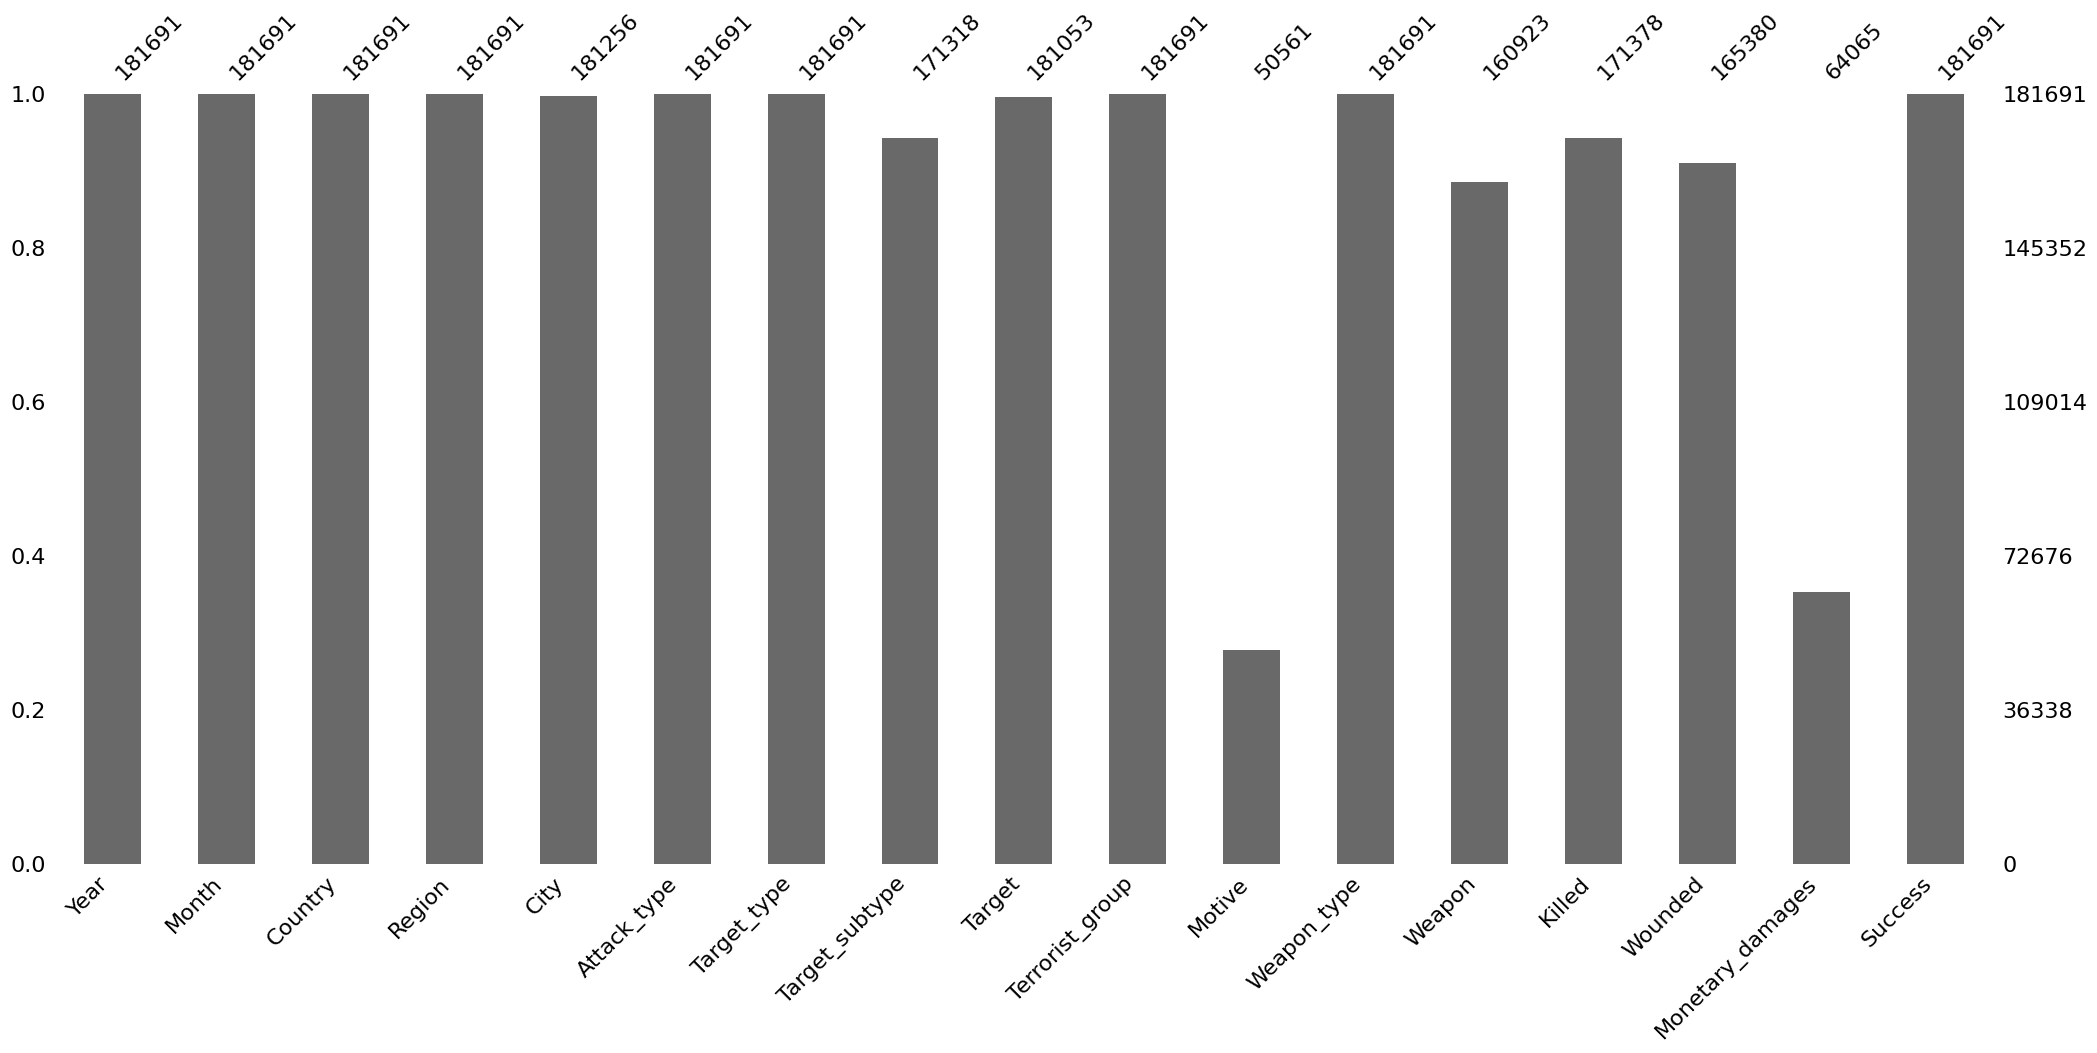

In [12]:
 # Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

The GTD dataset consists of 1,81,691 rows and 135 columns. It contains many columns which has only null values and irrelevant info.
After filtering, the columns which will be useful in our analysis comes out to be 17.

There are two columns specifically, Motive and Monetary_damages which includes 1,31,130 and 1,17,626 null values respectively.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Year', 'Month', 'Country', 'Region', 'City', 'Attack_type',
       'Target_type', 'Target_subtype', 'Target', 'Terrorist_group', 'Motive',
       'Weapon_type', 'Weapon', 'Killed', 'Wounded', 'Monetary_damages',
       'Success'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe()

,Year,Month,Killed,Wounded,Success
count,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000
mean,2002.638997,6.467277,2.403272,3.167668,0.889598
std,13.259430,3.388303,11.545741,35.949392,0.313391
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,0.000000,1.000000
50%,2009.000000,6.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,2.000000,2.000000,1.000000
max,2017.000000,12.000000,1570.000000,8191.000000,1.000000


### Variables Description

In GTD, the variables are:


*   **Year :** Year in which the terror activity occured

*   **Month :** Month in which the terror activity occured

*   **Country :** Country where terror activity occured

*   **Region :** Region where terror activity occured

*   **City :** City where terror activity occured

*   **Attack_type :** The type of attack like Assasination, Kidnapping, etc.

*   **Target_type :** Organization being targeted like, Government, Police, Journalists and Media, Military etc.
*   **Target_subtype :** More granular description about the organization being
     targeted like Diplomatic Personnel, Embassy, Journalist etc.


*   **Target :** Exact person being targeted.


*   **Terrorist_group :** Terrorist group which did the attack.


*  **Motive :** Agenda for the attack by the terrorist group.


*   **Weapon_type :**Type of weapon used to commit the terror attack:
      Incendiary, Explosives, Firearms etc.


*   **Weapon :**More detailed description of the weapon being used like Autpmatic/Semiautomatic, Molotov/Petrol Bomb, etc.


*   **Killed :** Number of people killed in the attack.

*   **Wounded :** Number of people wounded/injured in the attack.


*   **Monetary_damages** Estimated damages to property.


*   **Success :**






### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
df[df.duplicated()]
# 11885 total duplicates rows

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
68,1970,2,United States,North America,Berkeley,Bombing/Explosion,Business,Retail/Grocery/Bakery,department store,Unknown,NaN,Explosives,Unknown Explosive Type,0.0,0.0,Minor (likely < $1 million),1
88,1970,2,United States,North America,South Sioux City,Bombing/Explosion,Utilities,Electricity,Power Transmission Pole in the Dakota City/Sio...,Strikers,The attack occurred during the violent Iowa Be...,Explosives,Dynamite/TNT,0.0,0.0,NaN,1
89,1970,2,United States,North America,South Sioux City,Bombing/Explosion,Utilities,Electricity,Power Transmission Pole in the Dakota City/Sio...,Strikers,The attack occurred during the violent Iowa Be...,Explosives,Dynamite/TNT,0.0,0.0,NaN,1
90,1970,2,United States,North America,South Sioux City,Bombing/Explosion,Utilities,Electricity,Power Transmission Pole in the Dakota City/Sio...,Strikers,The attack occurred during the violent Iowa Be...,Explosives,Dynamite/TNT,0.0,0.0,NaN,1
108,1970,3,United States,North America,Denver,Bombing/Explosion,Private Citizens & Property,Vehicles/Transportation,Foreign cars painted red,Left-Wing Militants,NaN,Explosives,Dynamite/TNT,0.0,0.0,Minor (likely < $1 million),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181556,2017,12,United Kingdom,Western Europe,Londonderry,Armed Assault,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilian,Unknown,NaN,Firearms,Unknown Gun Type,0.0,1.0,NaN,1
181634,2017,12,Israel,Middle East & North Africa,Unknown,Bombing/Explosion,Unknown,NaN,Unknown,Unknown,NaN,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",0.0,0.0,NaN,0
181644,2017,12,Greece,Western Europe,Piraeus,Unknown,Private Citizens & Property,Religion Identified,Residence of Muslim Civilians,Crypteia,NaN,Unknown,NaN,0.0,0.0,NaN,1
181650,2017,12,Pakistan,South Asia,Quetta,Bombing/Explosion,Unknown,NaN,Unknown,Unknown,NaN,Explosives,Unknown Explosive Type,0.0,0.0,NaN,0


In [17]:
df.drop_duplicates(keep='first', inplace=True)
# keeping the first occurence of all rows and removing the duplicates.
# After removing the duplicates, the number of records are 169806.

In [18]:
# Handling null values
df.fillna(value ={'City':'Unknown', 'Target_subtype':'Unknown','Target':'Unknown','Motive':'Unknown','Weapon':'Unknown','Monetary_damages':'Unknown'}, inplace = True)
df

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
0,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Named Civilian,Julio Guzman,MANO-D,Unknown,Unknown,Unknown,1.0,0.0,Unknown,1
1,1970,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",23rd of September Communist League,Unknown,Unknown,Unknown,0.0,0.0,Unknown,1
2,1970,1,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Radio Journalist/Staff/Facility,Employee,Unknown,Unknown,Unknown,Unknown,1.0,0.0,Unknown,1
3,1970,1,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,U.S. Embassy,Unknown,Unknown,Explosives,Unknown Explosive Type,NaN,NaN,Unknown,1
4,1970,1,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate,U.S. Consulate,Unknown,Unknown,Incendiary,Unknown,NaN,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,Somalia,Sub-Saharan Africa,Ceelka Geelow,Armed Assault,Military,Military Checkpoint,Checkpoint,Al-Shabaab,Unknown,Firearms,Unknown Gun Type,1.0,2.0,Unknown,1
181687,2017,12,Syria,Middle East & North Africa,Jableh,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,Muslim extremists,Unknown,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,Unknown,1
181688,2017,12,Philippines,Southeast Asia,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Houses,Bangsamoro Islamic Freedom Movement (BIFM),Unknown,Incendiary,Arson/Fire,0.0,0.0,Unknown,1
181689,2017,12,India,South Asia,Imphal,Bombing/Explosion,Government (General),Government Building/Facility/Office,Office,Unknown,Unknown,Explosives,Grenade,0.0,0.0,Unknown,0


For all the Categorical columns we have filled the missing values accordingly. For remaining 2 Numerical columns i.e. 'Killed' and 'Wounded', finding the best way to handle missing values.

In [19]:
df.sort_values('Killed',ascending=False).head(10)

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
133518,2014,6,Iraq,Middle East & North Africa,Tikrit,Hostage Taking (Kidnapping),Military,"Military Personnel (soldiers, troops, officers...",Soldiers,Islamic State of Iraq and the Levant (ISIL),The Islamic State of Iraq and the Levant (ISIL...,Firearms,Unknown Gun Type,1570.0,NaN,Unknown,1
73126,2001,9,United States,North America,New York City,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,Al-Qaida,Unknown,Vehicle (not to include vehicle-borne explosiv...,Unknown,1384.0,8190.0,Catastrophic (likely >= $1 billion),1
73127,2001,9,United States,North America,New York City,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on United Airlines...,Al-Qaida,Unknown,Vehicle (not to include vehicle-borne explosiv...,Unknown,1383.0,8191.0,Catastrophic (likely >= $1 billion),1
55934,1994,4,Rwanda,Sub-Saharan Africa,Gikoro,Armed Assault,Private Citizens & Property,Religion Identified,Group of Tutsi Refugees inside Catholic Church,Hutu extremists,Unknown,Firearms,Automatic or Semi-Automatic Rifle,1180.0,0.0,Unknown,1
136283,2014,8,Iraq,Middle East & North Africa,Sinjar,Hostage Taking (Kidnapping),Private Citizens & Property,Religion Identified,Yizidi Civilians,Islamic State of Iraq and the Levant (ISIL),"The specific motive is unknown; however, sourc...",Unknown,Unknown,953.0,NaN,Unknown,1
133225,2014,6,Iraq,Middle East & North Africa,Badush,Armed Assault,Police,Prison/Jail,Badush Prison,Islamic State of Iraq and the Levant (ISIL),"The specific motive is unknown; however, sourc...",Explosives,"Projectile (rockets, mortars, RPGs, etc.)",670.0,0.0,Minor (likely < $1 million),1
179671,2017,10,Somalia,Sub-Saharan Africa,Mogadishu,Bombing/Explosion,Business,Hotel/Resort,Hotel,Al-Shabaab,"The specific motive is unknown; however, sourc...",Explosives,Vehicle,588.0,316.0,Unknown,1
76347,2004,3,Nepal,South Asia,Dhading district,Armed Assault,Government (General),Government Building/Facility/Office,"Government infrastructure in the town of Bedi,...",Communist Party of Nepal- Maoist (CPN-M),Unknown,Firearms,Unknown Gun Type,518.0,216.0,Unknown,1
136746,2014,8,Syria,Middle East & North Africa,Unknown,Hostage Taking (Kidnapping),Military,Military Barracks/Base/Headquarters/Checkpost,Tabqa Airbase,Islamic State of Iraq and the Levant (ISIL),"The specific motive is unknown; however, sourc...",Explosives,"Projectile (rockets, mortars, RPGs, etc.)",517.0,NaN,Unknown,1
170198,2016,12,Syria,Middle East & North Africa,Palmyra,Hostage Taking (Kidnapping),Private Citizens & Property,Village/City/Town/Suburb,City,Islamic State of Iraq and the Levant (ISIL),Unknown,Explosives,Vehicle,433.0,NaN,Unknown,1


<Axes: ylabel='Frequency'>

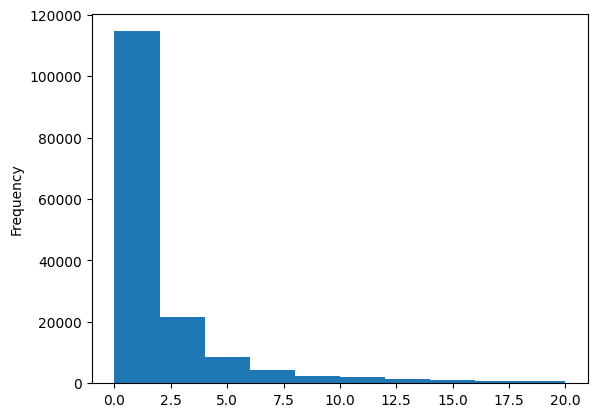

In [20]:
df['Killed'].plot(kind='hist',range=[0,20])
# From the Histogram, we can see that the data is highly skewed and nearly 2/3rd of total rows are near mean i.e. '0'.

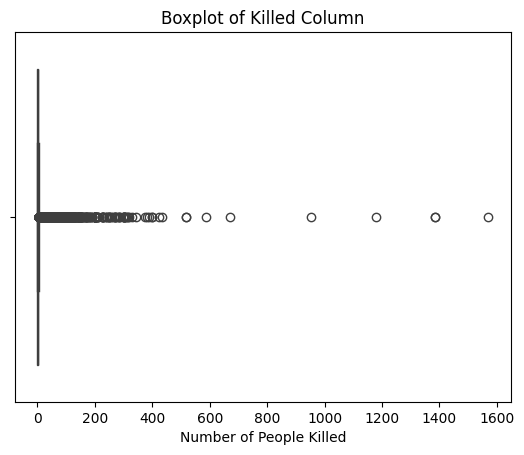

In [21]:
sns.boxplot(x=df['Killed'])
plt.title('Boxplot of Killed Column')
plt.xlabel('Number of People Killed')
plt.show()

In [22]:
Q1 = df['Killed'].quantile(0.25)
Q3 = df['Killed'].quantile(0.75)
Q2 = df['Killed'].quantile(0.50)
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)


0.0
1.0
2.0
2.0


In [23]:
# identify outliers
threshold = 1.5
outliers = df[(df['Killed'] < Q1 - threshold * IQR) | (df['Killed'] > Q3 + threshold * IQR)]

In [24]:
outliers
# There are more than 16K records which is near about 9-10% of the total records.

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
62,1970,2,West Germany (FRG),Western Europe,Munich,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Jewish Old People's Home,Popular Front for the Liberation of Palestine ...,Unknown,Incendiary,Unknown,7.0,9.0,Minor (likely < $1 million),1
80,1970,2,Switzerland,Western Europe,Zurich,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Swiss Air DC-9,"Popular Front for the Liberation of Palestine,...",Unknown,Explosives,Unknown Explosive Type,47.0,0.0,Major (likely >= $1 million but < $1 billion),1
210,1970,4,Philippines,Southeast Asia,Cauayan,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),Philippines Airlines Aircraft,Unknown,Unknown,Explosives,Unknown Explosive Type,36.0,0.0,Major (likely >= $1 million but < $1 billion),1
1085,1971,11,Taiwan,East Asia,Unknown,Bombing/Explosion,Airports & Aircraft,Aircraft (not at an airport),China Airlines Caravelle en route Taipei to Ho...,Unknown,Unknown,Explosives,Unknown Explosive Type,25.0,NaN,Major (likely >= $1 million but < $1 billion),1
1099,1971,12,United Kingdom,Western Europe,Belfast,Bombing/Explosion,Business,Restaurant/Bar/Café,15 Catholics,Ulster Volunteer Force (UVF),Unknown,Explosives,Unknown Explosive Type,15.0,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181656,2017,12,Nigeria,Sub-Saharan Africa,Maiwa,Armed Assault,Private Citizens & Property,Laborer (General)/Occupation Identified,Loggers,Boko Haram,Unknown,Firearms,Unknown Gun Type,25.0,NaN,Minor (likely < $1 million),1
181672,2017,12,India,South Asia,Lethapora,Armed Assault,Police,"Police Building (headquarters, station, school)",Camp,Jaish-e-Mohammad (JeM),"The specific motive is unknown; however, sourc...",Explosives,Grenade,8.0,3.0,Unknown,1
181673,2017,12,Afghanistan,South Asia,Jalalabad,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",Funeral Procession of Former District Governor,Khorasan Chapter of the Islamic State,Unknown,Explosives,Vehicle,18.0,14.0,Unknown,1
181679,2017,12,Iraq,Middle East & North Africa,Muqdadiyah,Armed Assault,Military,Military Barracks/Base/Headquarters/Checkpost,Post,Islamic State of Iraq and the Levant (ISIL),Unknown,Firearms,Unknown Gun Type,13.0,0.0,Unknown,0


In [25]:
df.sort_values('Wounded',ascending=False).head(10)

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
73127,2001,9,United States,North America,New York City,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on United Airlines...,Al-Qaida,Unknown,Vehicle (not to include vehicle-borne explosiv...,Unknown,1383.0,8191.0,Catastrophic (likely >= $1 billion),1
73126,2001,9,United States,North America,New York City,Hijacking,Private Citizens & Property,Unnamed Civilian/Unspecified,Passengers and crew members on American Airlin...,Al-Qaida,Unknown,Vehicle (not to include vehicle-borne explosiv...,Unknown,1384.0,8190.0,Catastrophic (likely >= $1 billion),1
58841,1995,3,Japan,East Asia,Tokyo,Unarmed Assault,Transportation,Subway,Subway system,Aum Shinri Kyo,Unknown,Chemical,Unknown,13.0,5500.0,Unknown,1
68071,1998,8,Kenya,Sub-Saharan Africa,Nairobi,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate,"United States Embassy in Nairobi, Kenya",Al-Qaida,Unknown,Explosives,Vehicle,224.0,4000.0,Major (likely >= $1 million but < $1 billion),1
159773,2016,3,Iraq,Middle East & North Africa,Taza Khurmatu,Bombing/Explosion,Private Citizens & Property,Village/City/Town/Suburb,Subdistrict,Islamic State of Iraq and the Levant (ISIL),Unknown,Chemical,Explosive,3.0,1500.0,Minor (likely < $1 million),1
61548,1996,1,Sri Lanka,South Asia,Colombo,Bombing/Explosion,Business,Bank/Commerce,Bank,Liberation Tigers of Tamil Eelam (LTTE),Unknown,Explosives,Vehicle,90.0,1272.0,Unknown,1
85682,2008,2,Chad,Sub-Saharan Africa,N'Djamena,Armed Assault,Government (General),Head of State,President Idriss Deby,Rebels,The rebels were trying to topple President Idr...,Firearms,Automatic or Semi-Automatic Rifle,160.0,1001.0,Unknown,1
179344,2017,10,United States,North America,Las Vegas,Armed Assault,Business,Entertainment/Cultural/Stadium/Casino,Security Guard: Jesus Campos,Anti-Government extremists,Unknown,Firearms,Automatic or Semi-Automatic Rifle,59.0,851.0,Unknown,1
81098,2006,7,India,South Asia,Mumbai,Bombing/Explosion,Transportation,Train/Train Tracks/Trolley,People in rush hour,Lashkar-e-Taiba (LeT),Unknown,Explosives,Unknown Explosive Type,188.0,817.0,Major (likely >= $1 million but < $1 billion),1
54147,1992,11,Tajikistan,Central Asia,Dushanbe,Armed Assault,Private Citizens & Property,Refugee (including Camps/IDP/Asylum Seekers),Refugee camp,Unknown,Unknown,Firearms,Automatic or Semi-Automatic Rifle,0.0,800.0,Unknown,1


<Axes: ylabel='Frequency'>

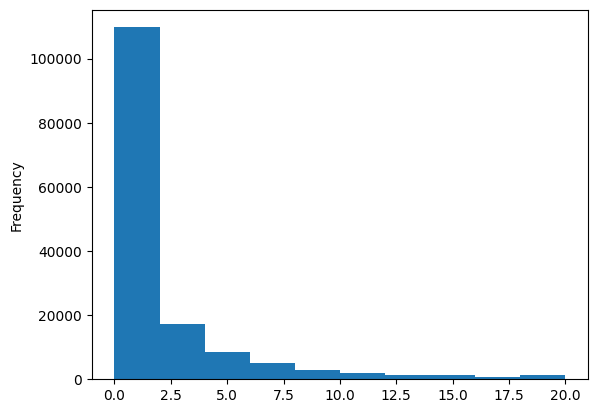

In [26]:
df['Wounded'].plot(kind='hist',range=[0,20])
# From the Histogram, we can see that the data is highly skewed and nearly 2/3rd of total rows are near mean i.e. '0'.

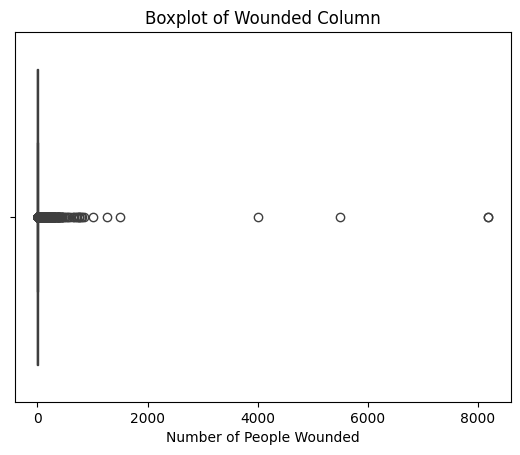

In [27]:
sns.boxplot(x=df['Wounded'])
plt.title('Boxplot of Wounded Column')
plt.xlabel('Number of People Wounded')
plt.show()

In [28]:

q1 = df['Wounded'].quantile(0.25)
q3 = df['Wounded'].quantile(0.75)
q2 = df['Wounded'].quantile(0.50)
iqr = q3 - q1
print(q1)
print(q2)
print(q3)
print(iqr)

0.0
0.0
2.0
2.0


In [29]:
# identify outliers
threshold = 1.5
outliers = df[(df['Wounded'] < Q1 - threshold * iqr) | (df['Wounded'] > Q3 + threshold * iqr)]
outliers
# There are more than 19K records which is near about 12-13% of the total records.

,Year,Month,Country,Region,City,Attack_type,Target_type,Target_subtype,Target,Terrorist_group,Motive,Weapon_type,Weapon,Killed,Wounded,Monetary_damages,Success
61,1970,2,United States,North America,Berkeley,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Police parking lot,Unknown,Unknown,Explosives,Unknown Explosive Type,0.0,7.0,Minor (likely < $1 million),1
62,1970,2,West Germany (FRG),Western Europe,Munich,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence,Jewish Old People's Home,Popular Front for the Liberation of Palestine ...,Unknown,Incendiary,Unknown,7.0,9.0,Minor (likely < $1 million),1
63,1970,2,United States,North America,Berkeley,Bombing/Explosion,Police,"Police Building (headquarters, station, school)",Berkeley Police Station,Black Nationalists,To intimidate the police.,Explosives,Dynamite/TNT,0.0,7.0,Minor (likely < $1 million),1
148,1970,3,United States,North America,New York City,Bombing/Explosion,Business,Entertainment/Cultural/Stadium/Casino,Electric Circus,Black Panthers,Unknown,Explosives,Dynamite/TNT,0.0,17.0,Minor (likely < $1 million),1
249,1970,5,United States,North America,New York City,Bombing/Explosion,Business,Entertainment/Cultural/Stadium/Casino,Dale Theater,Armed Revolutionary Independence Movement (MIRA),Unknown,Explosives,Other Explosive Type,0.0,10.0,Minor (likely < $1 million),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181651,2017,12,Afghanistan,South Asia,Khas Uruzgan district,Unknown,Military,Military Checkpoint,Checkpoints,Taliban,Unknown,Unknown,Unknown,11.0,15.0,Unknown,1
181653,2017,12,Cameroon,Sub-Saharan Africa,Bia,Bombing/Explosion,Business,Restaurant/Bar/Café,Cafe,Boko Haram,Unknown,Explosives,Suicide (carried bodily by human being),2.0,28.0,Minor (likely < $1 million),1
181671,2017,12,Iraq,Middle East & North Africa,Farhatiyah,Bombing/Explosion,Private Citizens & Property,Unnamed Civilian/Unspecified,Civilians,Islamic State of Iraq and the Levant (ISIL),Unknown,Explosives,Unknown Explosive Type,4.0,9.0,Unknown,1
181673,2017,12,Afghanistan,South Asia,Jalalabad,Bombing/Explosion,Private Citizens & Property,"Procession/Gathering (funeral, wedding, birthd...",Funeral Procession of Former District Governor,Khorasan Chapter of the Islamic State,Unknown,Explosives,Vehicle,18.0,14.0,Unknown,1


In [30]:
# We have more than 10K and 16K NULL records in the 'Killed' and 'Wounded' column respectively.
# Filling those missing values with the Median i.e. '0' because the data is highly skewed with 2/3rd values being '0' itself.
df.fillna(value= {'Killed':0, 'Wounded':0}, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169806 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Year              169806 non-null  int64  
 1   Month             169806 non-null  int64  
 2   Country           169806 non-null  object 
 3   Region            169806 non-null  object 
 4   City              169806 non-null  object 
 5   Attack_type       169806 non-null  object 
 6   Target_type       169806 non-null  object 
 7   Target_subtype    169806 non-null  object 
 8   Target            169806 non-null  object 
 9   Terrorist_group   169806 non-null  object 
 10  Motive            169806 non-null  object 
 11  Weapon_type       169806 non-null  object 
 12  Weapon            169806 non-null  object 
 13  Killed            169806 non-null  float64
 14  Wounded           169806 non-null  float64
 15  Monetary_damages  169806 non-null  object 
 16  Success           169806 

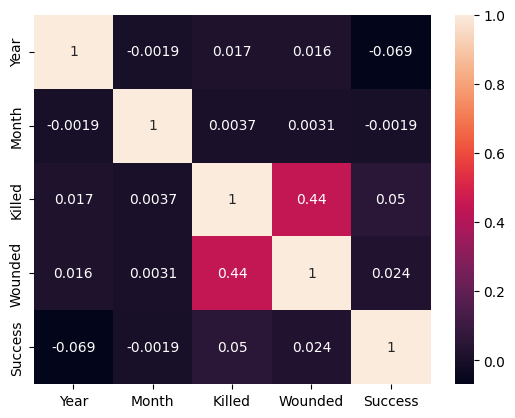

In [32]:
hm = sns.heatmap(df[['Year','Month', 'Killed', 'Wounded', 'Success']].corr(), annot=True)
# From the heatmap, it is clear that 'Killed' and 'Wounded' columns have high correlation.

In [33]:
df['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [34]:
df['Motive'].unique()

array(['Unknown', 'To protest the Cairo Illinois Police Deparment',
       'To protest the War in Vietnam and the draft', ...,
       'The specific motive is unknown; however, sources stated that the attack was carried out in retaliation for the death of Noor Mohammad Tantray (Noor Trali), a Jaish-e-Mohammad (JeM) leader, by security personnel on December 26, 2017 in Pulwama.',
       'The specific motive is unknown; however, sources noted that the targeted building housed migrants.',
       'The specific motive is unknown; however, sources stated that the Taliban had warned one of the victims against collaborating with the government.'],
      dtype=object)

In [35]:
# Need to find out the top 10 terror groups and their motive behind the attack
# Weapons mostly used by terror groups to conduct such activities
# Top 10 Countries and cities affected most by the terror activities
# Try to find the trend in number of attacks in each decade

In [36]:
year_wise_attacks = df['Year'].value_counts().reset_index(name = 'Number_of_attacks')
year_wise_attacks.sort_values(by = 'Year').head(10)

,Year,Number_of_attacks
42,1970,640
46,1971,461
44,1972,528
45,1973,469
43,1974,571
41,1975,723
40,1976,889
37,1977,1217
33,1978,1458
29,1979,2375


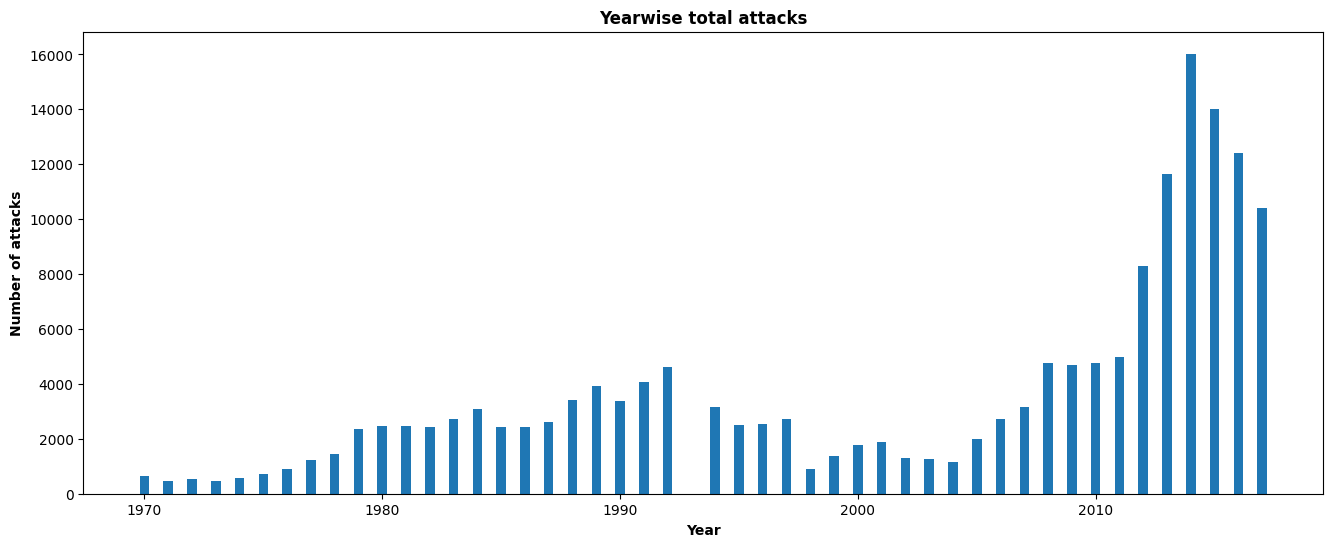

In [37]:
years = list(year_wise_attacks['Year'])
total_attacks = list(year_wise_attacks['Number_of_attacks'])
fig = plt.figure(figsize = (16,6))
plt.bar(years, total_attacks, width = 0.4)
plt.xlabel('Year', weight='bold')
plt.ylabel('Number of attacks', weight='bold')
plt.title('Yearwise total attacks', weight='bold')
plt.show()

In [38]:
year_wise_attacks[year_wise_attacks['Year']==1993]

,Year,Number_of_attacks


Few trends that we can observe from the above Graph:


*   There has been steady increase in number of attacks from 1970 which peaked at 1992 and then gradually decreased and stabilized to less than 2000 attacks per year from 1998 till 2005
*   After 2011, there is sharp increase in the number of attacks which peaked at 2014 with total number of attacks near about 16000 in just single year and then dipped to nearly 10000 in 2017

Let's find out the reasons that led to sudden increase in the number of attacks.



In [39]:
# Terrorist Groups active till 2011
groups_active_till_2011 = df[df['Year']< 2012]
groups_active_till_2011['Terrorist_group'].nunique()

2926

In [41]:
# Terrorist Groups active after 2011
groups_active_after_2011 = df[df['Year']>= 2012]
groups_active_after_2011['Terrorist_group'].nunique()

892

It is quite surprising to find out that the Number of terrorist groups active after 2011 actually decreased to 892 from 2926.

This suggests only three possible happenings:


*   Either some groups have become non-active after 2011
*   Or many small groups consolidated to become one larger terrorist group

*   Or combination of both the above points





In [ ]:
# Try to find out the common terrorist groups which are present before and after 2012. And try to find out whether these common groups have resulted in such sharp increase after 2012 or is it due to new groups

In [39]:
df['Terrorist_group'].nunique()

3537

In [ ]:
newdf = df.copy()

In [ ]:
# bins = [1970, 1980, 1990, 2000, 2010, 2017]
# labels = ['D1', 'D2', 'D3', 'D4', 'D5']
# newdf['Decades'] = pd.cut(newdf['Year'], bins, labels = labels)
# newdf

### What all manipulations have you done and insights you found?

Answer Here.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***